### Encontrar el logotipo de la gaseosa dentro de las imágenes provistas en  
### Material_TPs/TP3/images a partir del template Material_TPs/TP3/template

### 1- (4 puntos) Obtener una detección del logo en cada imagen sin falsos positivos

In [1]:
import numpy as np
import cv2 as cv

#funcion para single template
def get_single_match(img, method):
    # Leer el template y la imagen
    template = cv.imread('./template/pattern.png')
    template = cv.cvtColor(template, cv.COLOR_BGR2GRAY)
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    template = cv.Canny(template, 50, 100)    # Postprocesamiento parapara detección de bordes con Canny
    score = None

    x_start, y_start, x_stop, y_stop = 0, 0, 0, 0
    scales = np.linspace(0.01, 3, 60)    # 
    for scale in scales: 
        resize_img_gray = cv.resize(img_gray, None, fx=scale, fy=scale) # Reescalar la imagen.
        #rescaled_img_gray = cv.resize(img_gray, None, scale, scale)
        if resize_img_gray.shape[0] > template.shape[0] and resize_img_gray.shape[1] > template.shape[1]:  # imagen debe ser mas grande que el template
            threshold2, _ = cv.threshold(resize_img_gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)  # se utilizo OTSU y binarizacion para encontrar umbrales
            #threshold1 = 0.5 * threshold2
            resize_img_gray = cv.Canny(resize_img_gray, 0.5*threshold2, threshold2) # Postprocesamiento con Canny a imagen redimensionada
            result = cv.matchTemplate(resize_img_gray, template, method)
            min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)
            
            # Si el score supera al actual, guardarlo junto con las coordenadas del mismo.
            # Si el método es cv.TM_SQDIFF o TM_SQDIFF_NORMED, se toman los mínimos.
            if (score is None or min_val < score) and (method == cv.TM_SQDIFF or method == cv.TM_SQDIFF_NORMED):
                score = min_val
                x_start, y_start = (int(min_loc[0] / scale), int(min_loc[1] / scale))
                x_stop, y_stop = (int((min_loc[0] + template.shape[1]) / scale), int((min_loc[1] + template.shape[0]) / scale))
            elif score is None or max_val > score:
                score = max_val
                x_start, y_start = (int(max_loc[0] / scale), int(max_loc[1] / scale))
                x_stop, y_stop = (int((max_loc[0] + template.shape[1]) / scale), int((max_loc[1] + template.shape[0]) / scale))

    cv.rectangle(img_rgb,(x_start, y_start),(x_stop, y_stop),(0, 0, 255),2)
    
    return img_rgb, score

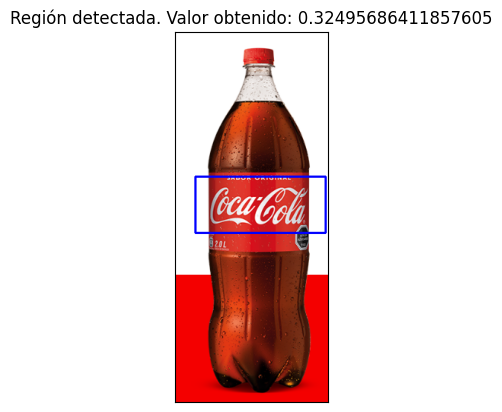

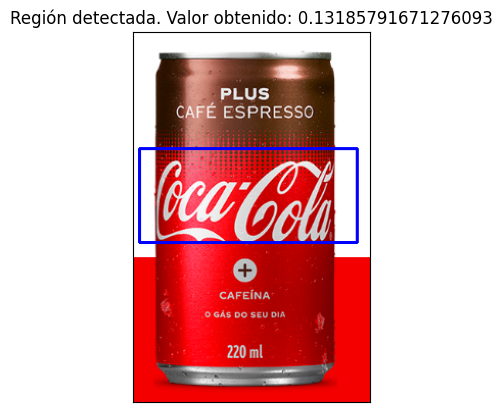

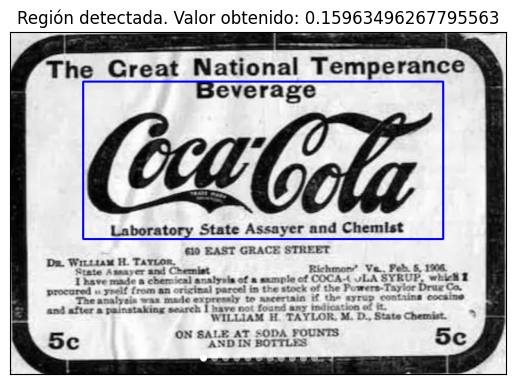

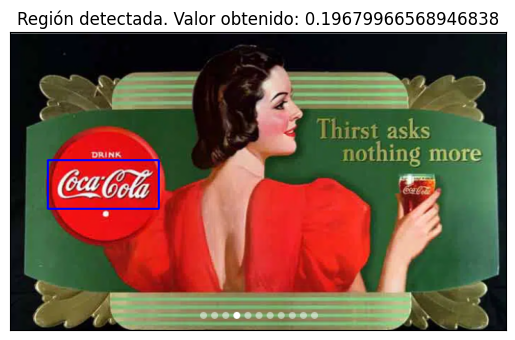

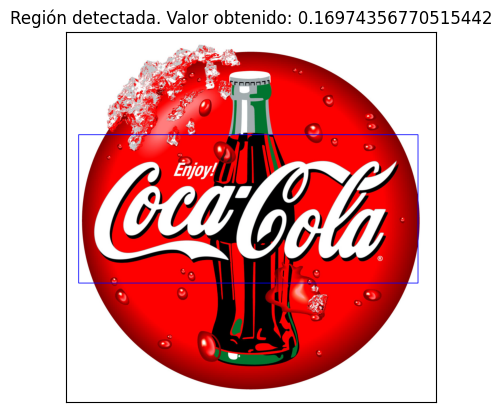

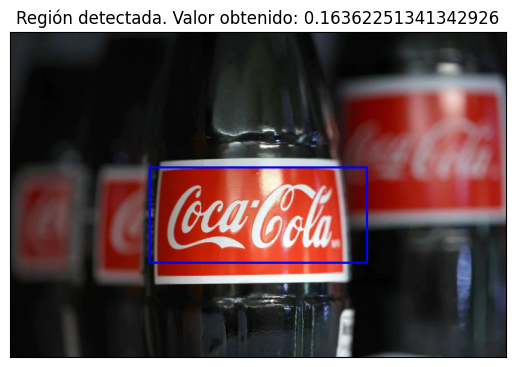

In [3]:
import cv2 as cv
from matplotlib import pyplot as plt
#from CocaColaSingleTemplateMatching import get_cocacola_single_match
list_img = ['coca_logo_1.png','coca_logo_2.png','coca_retro_1.png','coca_retro_2.png','COCA-COLA-LOGO.jpg','logo_1.png']
#fig, ax = plt.subplots(6,1, figsize=(10,20))
for var in range(len(list_img)):
    path_img='./images/' + list_img[var]
    #print(path_img)
    img1 = cv.imread(path_img)
    result_img, score = get_single_match(img1, cv.TM_CCORR_NORMED)
    #ax[var][0].imshow(result_img)
    plt.imshow(result_img)
    #ax(var).imshow(result_img)
    #ax[var][0].set_title(f'Región detectada. Valor obtenido: {score}')
    plt.title(f'Región detectada. Valor obtenido: {score}')
    plt.xticks([])
    plt.yticks([])
    plt.show()



In [4]:
list_img = ['coca_logo_1.png','coca_logo_2.png','coca_retro_1.png','coca_retro_2.png','COCA-COLA-LOGO.jpg','logo_1.png']

for var in range(len(list_img)):
    path_img='./images/' + list_img[var]
    img1 = cv.imread(path_img)
    print(img1.shape)


img1 = cv.imread('./template/pattern.png')
print(img1.shape)


(500, 207, 3)
(363, 233, 3)
(493, 715, 3)
(429, 715, 3)
(1389, 1389, 3)
(450, 687, 3)
(175, 400, 3)


In [5]:
scales = np.linspace(0.01, 3, 30)
for scale in scales:
    print(scales*100)

[  1.          11.31034483  21.62068966  31.93103448  42.24137931
  52.55172414  62.86206897  73.17241379  83.48275862  93.79310345
 104.10344828 114.4137931  124.72413793 135.03448276 145.34482759
 155.65517241 165.96551724 176.27586207 186.5862069  196.89655172
 207.20689655 217.51724138 227.82758621 238.13793103 248.44827586
 258.75862069 269.06896552 279.37931034 289.68965517 300.        ]
[  1.          11.31034483  21.62068966  31.93103448  42.24137931
  52.55172414  62.86206897  73.17241379  83.48275862  93.79310345
 104.10344828 114.4137931  124.72413793 135.03448276 145.34482759
 155.65517241 165.96551724 176.27586207 186.5862069  196.89655172
 207.20689655 217.51724138 227.82758621 238.13793103 248.44827586
 258.75862069 269.06896552 279.37931034 289.68965517 300.        ]
[  1.          11.31034483  21.62068966  31.93103448  42.24137931
  52.55172414  62.86206897  73.17241379  83.48275862  93.79310345
 104.10344828 114.4137931  124.72413793 135.03448276 145.34482759
 155.655